# Junior Data Engineer @ Welltory

## Сделал Саша Михайлов


Короткое резюме на [Google Drive](https://docs.google.com/document/d/1JWXxC06veqwTMu_nyUThv1OiIh_xJbSLBti6jRxtPFk/edit?usp=sharing
), подробнее — в [блоге](https://sashamikhailov.ru/blog/all/cv/)

Телеграм [@SashaMikhailov](https://tlg.name/SashaMikhailov), почта sasha@sashamikhailov.ru

[Сайт и блог](https://sashamikhailov.ru/blog/) × [Фейсбук](https://www.fb.com/sashamikhailovru) × [GitHub](https://github.com/Sasha-Mikhailov) 

# Вакансия

Тестовое задание подразумевает две вещи:
1. Текст, в котором виден ход ваших мыслей, ваши гипотезы и обоснование принятого подхода к решению.
2. Код с решением на примере данных и визуализацией результата (юпитер ноутбук).


**Задача звучит так - создать функцию на языке Python, которая для указанного произвольного пользователя берет его историю шагов и на выходе  отдает список размеченных дней:**
1. неизвестно 
2. обычный 
3. необычный
 
**Ваша цель - максимально попасть в субъективное ощущение пользователя**, чтобы он согласился с вашим мнением о том, что сегодня он прошел 10 000 шагов и это необычно. Или сегодня он прошел 6 000 шагов и в этом нет ничего необычного.  

**Текстовый документ должен отражать ваши рассуждения о решении этой задачи** (вводная часть ноутбука), обоснование выбранного подхода.  

**Код должен содержать реализацию вашего решения** на примере данных, которые прилагаются к тестовому заданию и предоставлять визуальное обоснование работоспособности решения, включая то, как вы выбираете тесты для проверки работоспособности.  

> _Поскольку абсолютное большинство наших разработок делается на языке Python, решение мы ожидаем на нем же. Ну, плюс к этому, ноутбуки желательно оформлять так, чтобы их можно было прочитать и перезапустить_ :)  

**Описание данных**:  
Записи по шагам одного человека (в качестве примера) в течение около 3-х месяцев. Каждая запись - это некий промежуток времени с известным количеством шагов в этот промежуток. Так присылают данные фитнес-трекеры, как именно они выбирают этот промежуток - неизвестно. Данные стоит считать корректными.  


Присылайте ваши ноутбуки в телеграм @smorodnikova вместе со своим резюме и вам скажут, проходите ли вы на следующий этап (собеседование). Будет здорово, если вы напишете, чем вам интересна эта вакансия. 


[оригинал задания в Гугл доке](https://docs.google.com/document/d/1Egz50Sc9AmBROXMA__fqWaGozR5dE3frQZjQXxsQzb0/edit?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set matplotlib defaults
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["figure.figsize"] = (12, 4)

In [3]:
def nice_plot(rot = -90):
    plt.xticks(rotation = rot,
               size = 'small',
               ha = 'center')
    plt.gca().tick_params(axis = 'both', 
                   color = 'w')

    plt.gca().set_xlabel('')
    plt.gca().set_ylabel('')

    plt.show()

## Загружаем данные

In [4]:
FILENAME = 'query_result_2019-12-24T07_29_06.659397Z.csv'

df = pd.read_csv(FILENAME)
df.head(3)

,Time End,Time End Local Tz,Time Offset,Time Start,Time Start Local Tz,User ID,Value
0,2019-05-05T09:40:00+03:00,2019-05-05T12:40:00+03:00,10800,2019-05-05T09:39:59+03:00,2019-05-05T12:39:59+03:00,2166,1.0
1,2019-05-05T11:13:29+03:00,2019-05-05T14:13:29+03:00,10800,2019-05-05T11:12:51+03:00,2019-05-05T14:12:51+03:00,2166,34.0
2,2019-05-05T12:07:42+03:00,2019-05-05T15:07:42+03:00,10800,2019-05-05T12:07:39+03:00,2019-05-05T15:07:39+03:00,2166,1.0


## Предобработка

смотрим типы данных и пропуски

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39671 entries, 0 to 39670
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time End             39671 non-null  object 
 1   Time End Local Tz    39671 non-null  object 
 2   Time Offset          39671 non-null  int64  
 3   Time Start           39671 non-null  object 
 4   Time Start Local Tz  39671 non-null  object 
 5   User ID              39671 non-null  int64  
 6   Value                39671 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.1+ MB


убираем лишнюю информацию — айди юзера (он одинаковый) и дубликат времени (оставим только местное время)

In [6]:
df.drop(['Time End', 'Time Start', 'User ID'], inplace = True, axis = 1)

переводим типы данных к нужным

In [7]:
for col in df.columns:
    if ('time' in col.lower()) & ~('offset' in col.lower()):
        df[col] = pd.to_datetime(df[col])

df['Value'] = pd.to_numeric(df['Value'], downcast = 'unsigned')
        
# df['Time End Local Tz'] = pd.to_datetime(df['Time End Local Tz'])
df.head(3)

,Time End Local Tz,Time Offset,Time Start Local Tz,Value
0,2019-05-05 12:40:00+03:00,10800,2019-05-05 12:39:59+03:00,1
1,2019-05-05 14:13:29+03:00,10800,2019-05-05 14:12:51+03:00,34
2,2019-05-05 15:07:42+03:00,10800,2019-05-05 15:07:39+03:00,1


переименовываем колонки для удобства

In [8]:
df.columns = ['end_ts', 'offset', 'start_ts', 'steps'] # 'uid',

### Ислледуем данные

распределние количество шагов (по одному замеру / сессии)

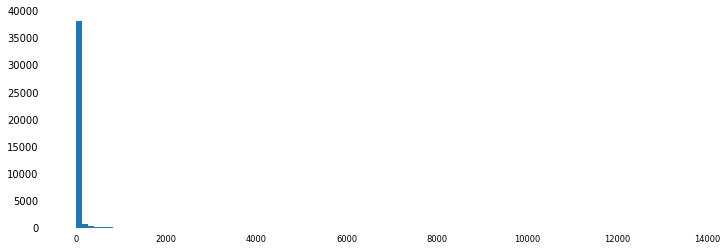

In [9]:
ax = df['steps'].plot(kind = 'hist', bins = 100)
nice_plot(rot = 0)

посчитаем длину одной сессии и скорость шага

In [10]:
df['period_s'] = ((df['end_ts'] - df['start_ts']) / np.timedelta64(1, 's')).astype(int)
df['pace'] = np.round(df['period_s'] / df['steps'], 4)

распределение длине сессии

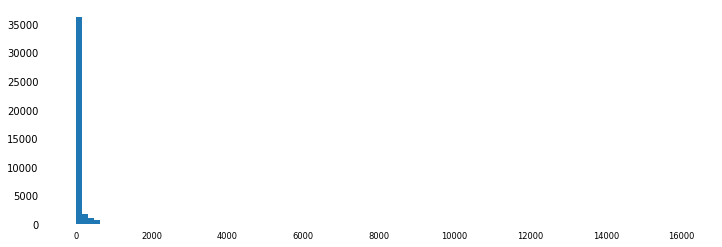

In [11]:
ax = df['period_s'].plot(kind = 'hist', bins = 100)
nice_plot(rot = 0)

распределение по скорости шага  (по одной сессии)

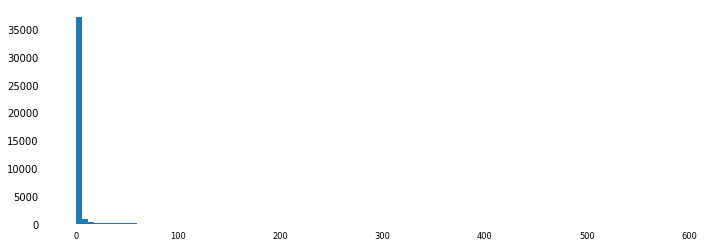

In [12]:
ax = df['pace'].plot(kind = 'hist', bins = 100)
nice_plot(rot = 0)

добавим в каком часу была активность

In [14]:
df['hour'] = df['start_ts'].dt.hour

# check result
df['hour'].nunique()

24

распределение активность по времени суток — больше всего с семи до девяти вечера

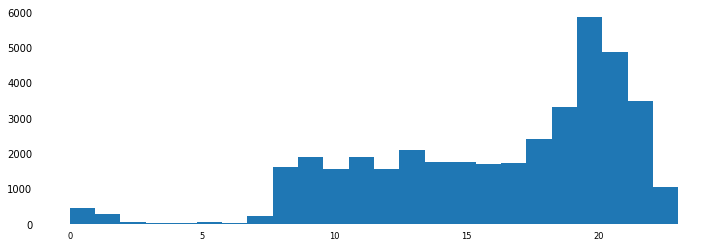

In [15]:
ax = df['hour'].plot(kind = 'hist', bins = 24)
nice_plot(rot = 0)

добавим день недели (0 — понедельник, 6 — воскресение)

In [16]:
df['weekday'] = df['start_ts'].dt.weekday

распределение количества сессий по дням недели — четкий спад к пятнице, пн-вт-сб-вс примерно вровень

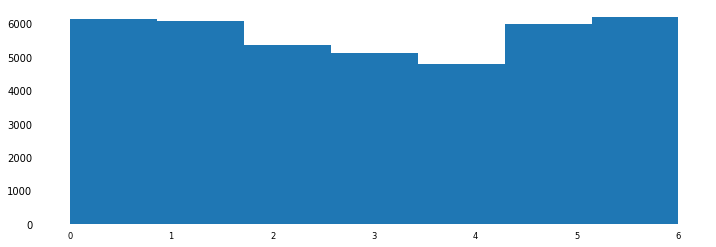

In [17]:
ax = df['weekday'].plot(kind = 'hist', bins = 7)
nice_plot(rot = 0)

описательная статистика (только для колонок, где это имеет смысл)

In [18]:
df[['steps', 'period_s', 'pace']].describe()

,steps,period_s,pace
count,39671.000000,39671.000000,39671.000000
mean,39.936024,54.111795,3.716254
std,129.078392,174.092053,20.699438
min,1.000000,1.000000,0.250000
25%,4.000000,3.000000,0.602000
50%,8.000000,13.000000,0.836400
75%,49.000000,59.000000,1.500000
max,13508.000000,16083.000000,596.000000


проверяем сколько сессий приходилось на полночь (начинается в одном дне, а заканчивается — в другом)

In [18]:
df['start_day'] = df['start_ts'].values.astype('datetime64[D]')
df['end_day'] = df['end_ts'].values.astype('datetime64[D]')

df.shape[0] - sum(df['start_day'] == df['end_day'])

0

Количество сессий по дням

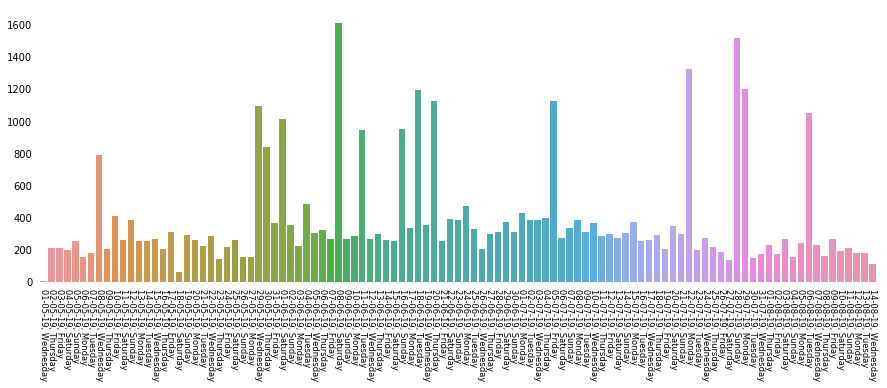

In [19]:
plt.figure(figsize = (15, 5))

ax = sns.countplot(df['start_day'])

ax.set_xticklabels(df['start_day'].sort_values().dt.strftime('%d-%m-%y, %A').unique())

nice_plot(rot = -90)

добавим на график все дни по порядку, чтобы было видно пустые дни (добавился только один)

In [20]:
sess_by_days = df.groupby('start_day').agg({'start_ts': 'count'})
# sess_by_days.head()

In [21]:
full_dates = (pd.date_range(df['start_day'].min(), 
                            df['start_day'].max()))
dates_index = pd.DataFrame(index = full_dates).reset_index()

full_sessions = (dates_index.merge(sess_by_days.reset_index(),
                                  how = 'left',
                                  left_on = 'index',
                                  right_on = 'start_day')
                             .drop(['start_day'], axis = 1)
                             .rename(columns = {'start_ts': 'sessions',
                                               'index': 'day'})
                )
full_sessions['sessions'] = full_sessions['sessions'].fillna(0).astype(int)

# full_sessions.head()

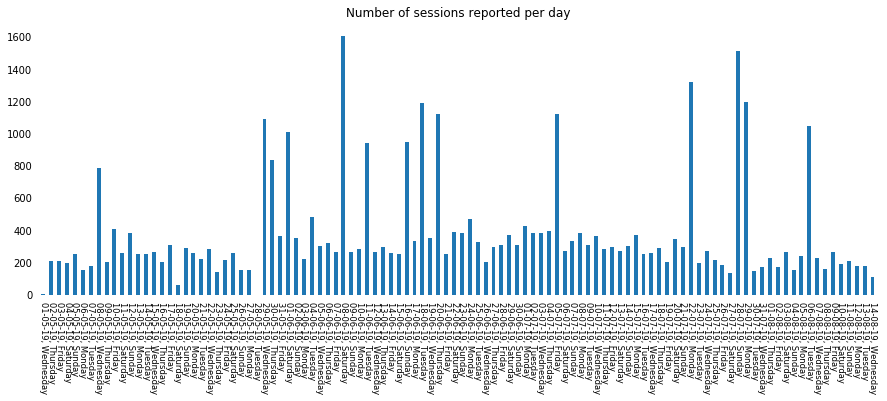

In [22]:
ax = full_sessions.set_index('day').plot(kind = 'bar', 
                                         figsize = (15,5), 
                                         legend = False)

ax.set_title('Number of sessions reported per day')

ax.set_xticklabels(full_sessions['day'].dt.strftime('%d-%m-%y, %A'))

nice_plot(rot = -90)

## Агрегация данных по дням

Соберём основные данные по дням

steps — шаги  
  
sessions_cnt — количество сессий измерений   
sessions_ttl_s — общая продолжительность сессий  
  
pace_avg — средняя скорость шага  
pace_median — медианная скорость шага (для оценки скошенности данных)  
  
timezone_current — текущий часовой пояс  
timezones_today — количество часовых поясов за день  
timezone_changed — если вчера был другой часовой пояс (т.е. был перелёт, возможно)  
  
weekday — день недели  


In [23]:
by_days = (df.groupby('start_day').agg({'steps': 'sum',
                                        'period_s': 'count',
                                        'pace': 'mean',
                                        'offset': 'mean',
                                      })
                                .rename(columns = {'period_s': 'sessions_cnt',
                                                  'pace': 'pace_avg',
                                                  'offset': 'timezone_current',})
           .join(df.groupby('start_day').agg({'period_s': 'sum',
                                              'pace': 'median',
                                              'weekday': 'first',
                                              'offset': 'nunique',
                                              })
                                .rename(columns = {'period_s': 'sessions_ttl_s',
                                                  'pace': 'pace_median',
                                                  'offset': 'timezones_today'}))
           
            )
# if unique timezones == 1, then no zones were changed during the day; 
# assign a zero there then
by_days['timezones_today'] = by_days['timezones_today'] - 1

by_days.sample(3)

,steps,sessions_cnt,pace_avg,timezone_current,sessions_ttl_s,pace_median,weekday,timezones_today
start_day,,,,,,,,
2019-08-08,7857,159,1.417921,10800,10295,0.8125,3,0
2019-06-27,13869,293,7.796731,10800,26571,1.5000,3,0
2019-06-13,17569,297,4.897948,10800,23061,1.0000,3,0


In [24]:
by_days = dates_index.set_index('index').merge(by_days,
                                              how = 'left',
                                              left_index = True,
                                              right_index = True).fillna(0)

In [25]:
# check if timezone changed previous day
# replace zeros with median to check with
by_days['timezone_current'].replace(0, 
                                    by_days['timezone_current'].median(),
                                    inplace = True)
# fill NaN on first position (appeared after shift) 
# with first value in that Series
# replace boolean with 0 and 1
by_days['timezone_changed'] = (by_days['timezone_current'] == 
                               by_days['timezone_current'].shift(1)
                                                          .fillna(by_days.iloc[0]['timezone_current'])
                               ).map({True: 0, 
                                      False: 1})

# by_days.sample(3)

In [26]:
# list of days with previously changed timezone
by_days[by_days['timezone_changed'] == 1]

,steps,sessions_cnt,pace_avg,timezone_current,sessions_ttl_s,pace_median,weekday,timezones_today,timezone_changed
index,,,,,,,,,
2019-06-29,17440.0,373.0,4.058691,7200.0,24538.0,1.00000,5.0,0.0,1
2019-06-30,15456.0,308.0,4.412109,10800.0,25128.0,1.33330,6.0,0.0,1
2019-07-01,18057.0,424.0,8.741811,7200.0,31509.0,1.29815,0.0,0.0,1
2019-07-08,21236.0,383.0,5.306540,10800.0,27734.0,1.01900,0.0,0.0,1


данные по количеству шагов по дням

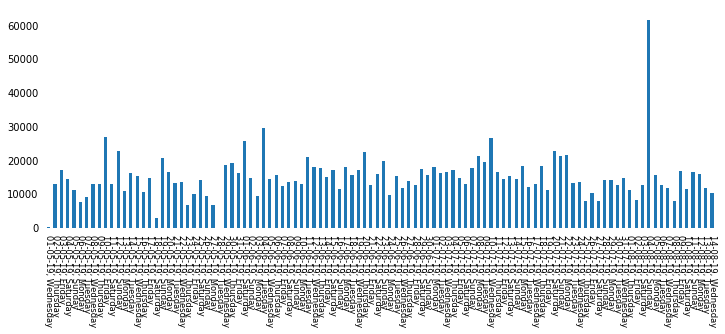

In [27]:
ax = by_days['steps'].plot(kind = 'bar')

plt.gca().set_xticklabels(by_days.index.strftime('%d-%m-%y, %A'))

nice_plot()

почистим очевидные выбросы перед обучением модели

оценим распределение количества шагов по дням на гистограмме и боксплоте

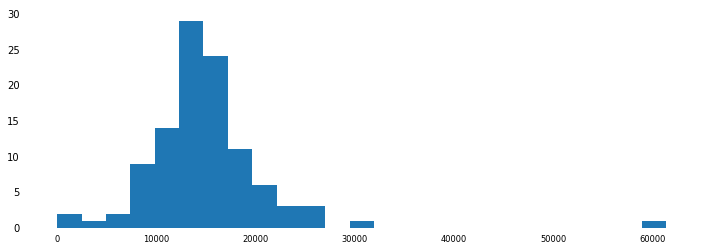

In [28]:
by_days['steps'].plot(kind = 'hist', bins = 25)
nice_plot(rot = 0)

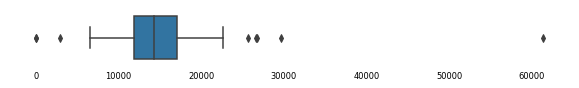

In [29]:
plt.figure(figsize = (10, 1))
sns.boxplot(by_days['steps'])
nice_plot(rot = 0)

посчитаем квартили и интерквартильный размах — IQR

In [30]:
Q25 = np.quantile(by_days['steps'], 0.25)
Q50 = np.quantile(by_days['steps'], 0.50)
Q75 = np.quantile(by_days['steps'], 0.75)
IQR = Q75 - Q25

Q25, Q75, IQR #, IQR * 1.5

(11795.75, 17093.75, 5298.0)

обозначим очевидные выбросы и нулевые значения

In [31]:
by_days['result'] = 0
by_days.loc[by_days['steps'] > Q75 + IQR * 1.5, 'result'] = 'unusual (above)'
by_days.loc[by_days['steps'] < Q25 - IQR * 1.5, 'result'] = 'unusual (below)'
by_days.loc[by_days['steps'] == 0, 'result'] = 'unknown'

посчитаем что получилось по выбросам

In [32]:
by_days['result'].value_counts()

0                  98
unusual (above)     5
unusual (below)     2
unknown             1
Name: result, dtype: int64

# Кластеризация через метод к-средних

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
def draw_line(y):
    plt.axhline(y = y, 
                color = 'black', 
                ls = '-', 
                lw = .5,
                alpha = .5)

In [35]:
def draw_quantiles(series_obj):
    
    Q25 = np.quantile(series_obj, 0.25)
    Q50 = np.quantile(series_obj, 0.50)
    Q75 = np.quantile(series_obj, 0.75)
    IQR = Q75 - Q25

    draw_line(Q50)
    draw_line(Q75 + IQR * 1.5)
    draw_line(Q25 - IQR * 1.5)

подготовим для обучения срез датафрейма только с «обычными» днями 

In [36]:
df_slice = (by_days[by_days['result'] == 0]
                .drop(['result', 
                       'timezone_current'], axis = 1))

чтобы воспользоваться алгоритмом к-средних, нужно знать количество кластеров. Чтобы понять, сколько кластеров, выведем дендрограмму.

/Users/alex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


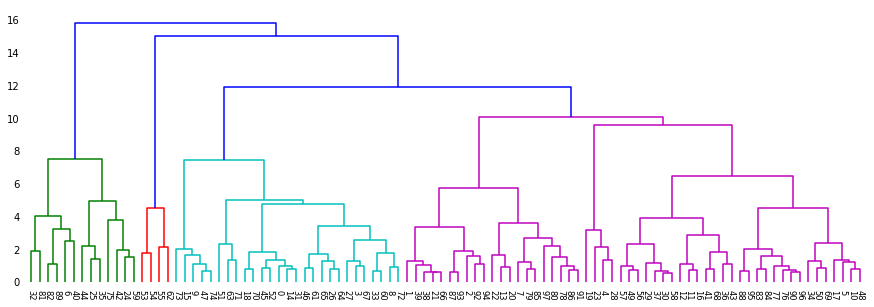

In [37]:
sc = StandardScaler()
x_sc = sc.fit_transform(df_slice)
linked = linkage(x_sc,
                 method = 'ward')

plt.figure(figsize = (15, 5))
dendrogram(linked, 
           orientation = 'top')
nice_plot()

Допустим, что кластеров — 4. 

Запустим алгоритм и выведем средние значения признаков по получившимся кластерам.

In [38]:
km = KMeans(n_clusters = 4, 
            random_state = 21012020)
labels = km.fit_predict(x_sc)
df_slice['label'] = labels


(df_slice.groupby('label').mean()
     .merge(df_slice['label'].value_counts(),
            left_index = True,
            right_index = True)
     .style
         .format('{:.1f}')
         .background_gradient(cmap = 'Greens')
)

,steps,sessions_cnt,pace_avg,sessions_ttl_s,pace_median,weekday,timezones_today,timezone_changed,label
0,16059.1,306.0,5.6,23639.4,1.1,3.7,0.0,0.0,41.0
1,18047.2,372.0,5.6,27227.2,1.2,2.8,0.0,1.0,4.0
2,16254.8,1132.4,1.8,19351.6,0.8,2.6,0.0,0.0,13.0
3,11735.5,211.2,4.4,15078.0,0.9,2.4,0.0,0.0,40.0


Результат работы алгоритма кластеризации (на срезе данных без выбросов):
0. **41 день «обычный»**: 16К шагов, высокая средняя скорость и общая длительность сессий
1. **4 дня «выше среднего»**: самый высокий показатель шагов и длительность; ещё в эти дни (или предыдуший) менялся часовой пояс 
2. **13 дней тоже «выше среднего»**: стандартные 16К шагов, но количество сессий в три раза выше среднего
3. **40 дней «так себе»**: в среднем 12К шагов и 211 сессий в день.

> _судя по количеству шагов, человек попался очень спортивный: даже в «так себе» дни больше десяти тысяч шагов_

Дадим понятные названия кластерам — `usual` и `unusual`. Второй тип ещё дополнительно разделим на `above` и `below` для внутреннего пользования и дебаггинга. 

In [39]:
df_slice['label'] = df_slice['label'].map({0: 'usual',
                                           1: 'unusual (above)',
                                           2: 'unusual (above)',
                                           3: 'unusual (below)'})

~~выведем результат работы алгоритма (пкоа на срезе данных — без выбросов и нулей)~~

In [ ]:
# plt.figure(figsize = (20, 5))

# ax = sns.barplot(y = 'steps', 
#             x = df_slice.index,
#             hue = 'label',
#             data = df_slice)
# plt.gca().set_xticklabels(df_slice.index.strftime('%d-%m-%y, %A'))
# plt.gca().set_title('Steps by usual and unusual days (w/o outliers)')

# draw_quantiles(df_slice['steps'])

# nice_plot()

переводим результаты алгоритма из среза обратно в полные данные 

In [41]:
by_days.loc[by_days['result'] == 0, 'result'] = df_slice['label']

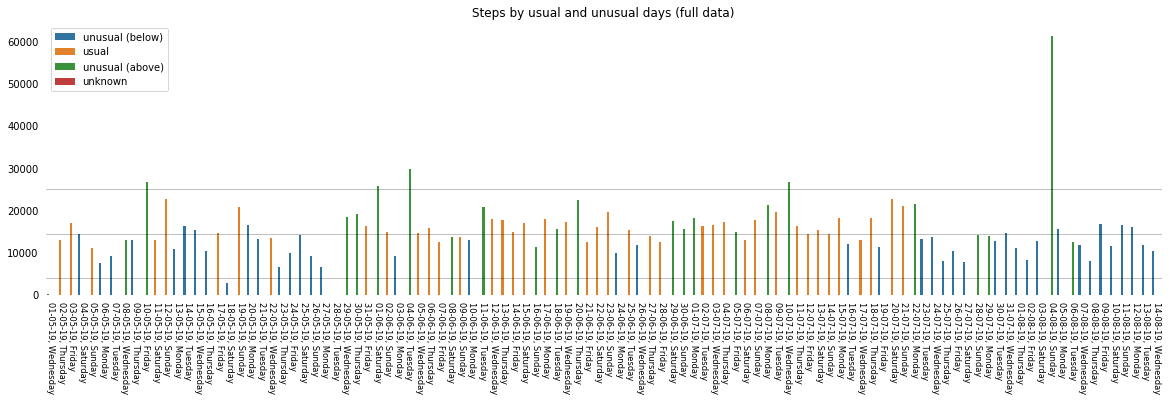

In [42]:
plt.figure(figsize = (20, 5))

ax = sns.barplot(y = 'steps', 
            x = by_days.index,
            hue = 'result',
            data = by_days)

plt.gca().set_xticklabels(by_days.index.strftime('%d-%m-%y, %A'))
plt.gca().set_title('Steps by usual and unusual days (full data)')
plt.gca().legend(loc = 'upper left')

draw_quantiles(by_days['steps'])

# plt.savefig('SMikhailov_Welltory_result', dpi = 100, bbox_inches = 'tight')

nice_plot()


# Вывод


Доступны данные с 1 мая по 14 августа 2019 года. Один день пропущен — 28 мая.

В период с 29 мая по 22 июля были самые активные дни. Посчитаем их «нормальными».

Ещё была поездка на неделю с 1 по 7 июля (не далеко — на один часовой пояс на запад).

До 29 мая и после 22 июля было больше всего «так себе» дней. Возможно, что если бы данных было больше, то «нормальными» стали бы как раз такие «так себе» дни, а не «супер-активные с 29.05 по 22.07.



### Общие мысли о данных

Данные реальные. Данные кого-то из Welltory: это проще всего — они самые доступные; и иначе были бы неэтично и странно — делиться данными клиентов.  

Этот кто-то живет в московском часовом поясе. Видимо, в Питере — там, где есть офис Welltory.  

Возможно, этот кто-то это тот, кому надо послать ноутбук на проверку, кто [1 июля ездил в Хельсинки](https://www.facebook.com/smorodnikova/posts/2526670934033292
) :Р 

Тогда можно предположить, что в мае была очень активная работа над приложением (поэтому снижена активность); потом два месяца отходняк и активного восстановления; и в августе снова в бой.


## Сделал Саша Михайлов


Короткое резюме на [Google Drive](https://docs.google.com/document/d/1JWXxC06veqwTMu_nyUThv1OiIh_xJbSLBti6jRxtPFk/edit?usp=sharing
), подробнее — в [блоге](https://sashamikhailov.ru/blog/all/cv/)

Телеграм [@SashaMikhailov](https://tlg.name/SashaMikhailov) 

[Сайт и блог](https://sashamikhailov.ru/blog/) × [Фейсбук](https://www.fb.com/sashamikhailovru) × [GitHub](https://github.com/Sasha-Mikhailov) 